# Exercise 1

The integral is estimated as	 1.3559051120131032
True Value:			 1.329340388179137
Error:				 1.9983387302595343 %



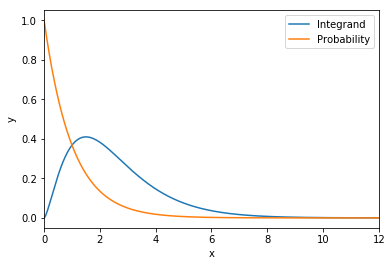

In [10]:
#Kaleb Kautzsch
#Part (i)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xmin = 0
xmax = 12

#Define function for Importance Sampling
def f(x):
    return x**(3/2)*np.exp(-x)

#Probability density function for comparison
def p(x):
    return np.exp(-x)

#A function that deletes the exponential
def q(x):
    return x**(3/2)

# integration of above example with importance sampling
N = 10000
integral = 0

for i in range(N):
    #Choose x uniformly
    x = np.random.exponential()
    #Function for sampled data
    integral += q(x)

measured = integral/N
true = 3*np.sqrt(np.pi)/4
print("The integral is estimated as\t", measured)
print('True Value:\t\t\t', true)
print('Error:\t\t\t\t', abs((measured-true))/true*100,'%\n')

# plot of the integrand
x = np.arange(xmin, xmax, 0.0001)
plt.plot(x, f(x), label='Integrand')
plt.plot(x, p(x), label='Probability')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.xlim(xmin, xmax)
plt.show()

In [11]:
#Part (ii)
integral2 = 0

for i in range(N):
    #Choose x uniformly
    x2 = np.random.random_sample()
    #Function for sampled data
    integral2 += q(x2)

measured2 = integral2/N
true = 3*np.sqrt(np.pi)/4
print("The integral is estimated as\t", measured2)
print('True Value:\t\t\t', true)
print('Error:\t\t\t\t', abs((measured-true))/true*100,'%')

The integral is estimated as	 0.397001339146006
True Value:			 1.329340388179137
Error:				 1.9983387302595343 %


In [12]:
#Part (iii) Extra Credit
x3 = 0.5
integral3 = 0
for i in range(N):
    
    #Changing the value of x by adding a random float between -0.05 and 0.05 to old x
    #How we choose the new x is our decision, this is just one option
    xchange = np.random.rand()*0.1-0.05
    xnew = x3 + xchange
    
    #If about to leave integration domain just reenter on the other side
    if xnew < 0: xnew += 1
    if xnew > 1: xnew -= 1
    
    #Metropolis algorithm
    if p(xnew)/p(x3) >= 1: 
        x3 = xnew
    else: 
        chance = np.random.rand()
        if chance <= p(xnew)/p(x3): 
            x3 = xnew
    #Sampling the integral using reduced function
    integral3 += q(x3)

#Because we are only generating values of x between 0 and 1
#We need to recalculate the norm of p(x), namely integral of p(x) between 0 and 1
norm = 1-np.exp(-1)
integral4 = integral3/N*norm

print("The integral equals:\t", integral4)
print("True Value:\t\t", true)
print("Error:\t\t\t", abs((measured-true))/true*100,'%')

The integral equals:	 0.1651242058906575
True Value:		 1.329340388179137
Error:			 1.9983387302595343 %


# Exercise 2
### Temperature = 1

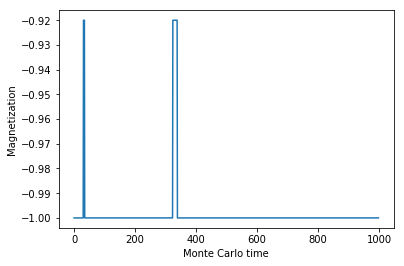

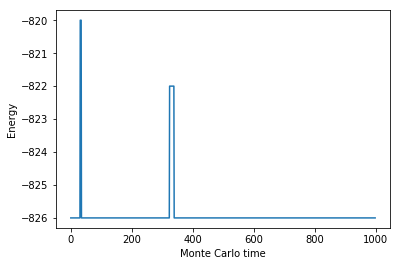

In [20]:
# define the system parameters
import numpy as np
import matplotlib.pyplot as plt

L = 5      # size of lattice in each direction
J = 1       # interaction parameter
h = 0       # magnetic field
T = 1       # temperature
beta = 1/T  # set k_B = 1

# define the state of the system: LxL grid with (initially) a random spin in each cell
config = 2*np.random.randint(2, size=(L,L))-1

# energy of a given state
def energy():  
    # elegant way of writing the sum over all nearest neighbors in the grid
    interaction = -J*( np.sum(config[0:L-1,:]*config[1:L,:]) +     # contributions of top/bottom neighbors
                       np.sum(config[:,0:L-1,]*config[:,1:L]))     # contributions of left/right neighbors
    
    magnetic = -h*np.sum(config)
    return interaction + magnetic

current_energy = energy()

# magnetization of a given state
def magnetization():
    return np.sum(config)/L/L

# Monte Carlo update using Metropolis algorithm
def update():
    
    global config, current_energy    # we want to be able to change the configuration
    
    # choose a random cell in the grid
    cell = np.random.randint(L, size=2)
    i = cell[0]
    j = cell[1]
    
    # calculate the current contribution of this cell to the total energy
    energy_cell = 0
    # be careful with the boundary
    '''This is an attempt at the extra credit'''
    if i != 0:   energy_cell += config[i-1, j]   # left neighbor
    else:                                    
        energy_cell += config[L-1, j] 
    if i != L-1: energy_cell += config[i+1, j]   # top neighbor
    if j != 0:   energy_cell += config[i, j-1]   # right neighbor
    else:                                    
        energy_cell += config[i, L-1]        
    if j != L-1: energy_cell += config[i, j+1]   # bottom neighbor
    '''End of extra credit attempt'''
    # the current contribution to the interaction energy is: -J*energy_cell*config[i,j]
    # if we flip the spin, i.e. change config[i,j] to -config[i,j], the new contribution will also change sign
    # this means that overall:
    
    energy_difference = 2*J*energy_cell*config[i,j]
    
    # additional contribution due to the magnetic field
    energy_difference += 2*h*config[i,j]
    
    # check if update is accepted
    accept = False
    if energy_difference<0: 
        accept = True    # always accept updates that decrease the energy
    else:
        prob = np.exp(-beta*energy_difference)
        # standard to calculate event given a probability (see example biasedCoin() in Section 3.1.3)
        rand = np.random.rand()
        if rand<prob:
            accept = True
            
    # if update is accepted we flip the spin
    if accept == True:
        config[i, j] = -config[i, j]
        current_energy += energy_difference
    
    # keep track of the acceptance probability
    return accept

# run the simulation
steps = int(1e6)
magnetization_results = []
energy_results = []
accept_results = []
accept_counter = 0

for counter in range(steps):

    accept_counter += update()
    # keep track of acceptance rates in blocks of 100 steps
    if counter%100 == 99:
        if counter > steps-1000:
            accept_results.append(accept_counter/100)
            accept_counter=0
    if counter > steps-1000:
        energy_results.append(current_energy)
        magnetization_results.append(magnetization())
    
plt.plot(magnetization_results)
plt.xlabel("Monte Carlo time")
plt.ylabel("Magnetization")
plt.show()

plt.plot(energy_results)
plt.xlabel("Monte Carlo time")
plt.ylabel("Energy")
plt.show()

### Temperature = 10

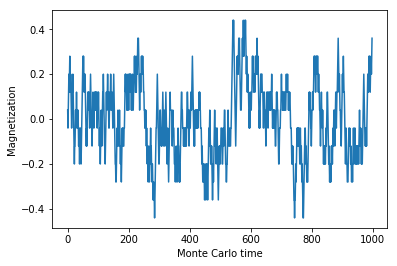

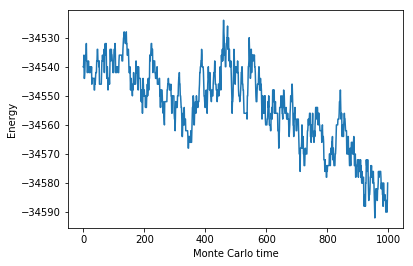

In [19]:
# define the system parameters
import numpy as np
import matplotlib.pyplot as plt

L = 5      # size of lattice in each direction
J = -1       # interaction parameter
h = 0       # magnetic field
T = 10       # temperature
beta = 1/T  # set k_B = 1

# define the state of the system: LxL grid with (initially) a random spin in each cell
config = 2*np.random.randint(2, size=(L,L))-1

# energy of a given state
def energy():  
    # elegant way of writing the sum over all nearest neighbors in the grid
    interaction = -J*( np.sum(config[0:L-1,:]*config[1:L,:]) +     # contributions of top/bottom neighbors
                       np.sum(config[:,0:L-1,]*config[:,1:L]))     # contributions of left/right neighbors
    
    magnetic = -h*np.sum(config)
    return interaction + magnetic

current_energy = energy()

# magnetization of a given state
def magnetization():
    return np.sum(config)/L/L

# Monte Carlo update using Metropolis algorithm
def update():
    
    global config, current_energy    # we want to be able to change the configuration
    
    # choose a random cell in the grid
    cell = np.random.randint(L, size=2)
    i = cell[0]
    j = cell[1]
    
    # calculate the current contribution of this cell to the total energy
    energy_cell = 0
    # be careful with the boundary
    '''Extra Credit Attempt'''
    if i != 0:   energy_cell += config[i-1, j]   # left neighbor
    else:                                    
        energy_cell += config[L-1, j] 
    if i != L-1: energy_cell += config[i+1, j]   # top neighbor
    if j != 0:   energy_cell += config[i, j-1]   # right neighbor
    else:                                    
        energy_cell += config[i, L-1]        
    if j != L-1: energy_cell += config[i, j+1]   # bottom neighbor
    '''End of Extra Credit Attempt'''
    # the current contribution to the interaction energy is: -J*energy_cell*config[i,j]
    # if we flip the spin, i.e. change config[i,j] to -config[i,j], the new contribution will also change sign
    # this means that overall:
    
    energy_difference = 2*J*energy_cell*config[i,j]
    
    # additional contribution due to the magnetic field
    energy_difference += 2*h*config[i,j]
    
    # check if update is accepted
    accept = False
    if energy_difference<0: 
        accept = True    # always accept updates that decrease the energy
    else:
        prob = np.exp(-beta*energy_difference)
        # standard to calculate event given a probability (see example biasedCoin() in Section 3.1.3)
        rand = np.random.rand()
        if rand<prob:
            accept = True
            
    # if update is accepted we flip the spin
    if accept == True:
        config[i, j] = -config[i, j]
        current_energy += energy_difference
    
    # keep track of the acceptance probability
    return accept

# run the simulation
steps = int(1e6)
magnetization_results = []
energy_results = []
accept_results = []
accept_counter = 0

for counter in range(steps):

    accept_counter += update()
    # keep track of acceptance rates in blocks of 100 steps
    if counter%100 == 99:
        if counter > steps-1000:
            accept_results.append(accept_counter/100)
            accept_counter=0
    if counter > steps-1000:
        energy_results.append(current_energy)
        magnetization_results.append(magnetization())
    
plt.plot(magnetization_results)
plt.xlabel("Monte Carlo time")
plt.ylabel("Magnetization")
plt.show()

plt.plot(energy_results)
plt.xlabel("Monte Carlo time")
plt.ylabel("Energy")
plt.show()

# Exercise 3